In [1]:
# This notebook runs from the projects root directory.
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/asset_classes_stationary_features.csv', index_col=0, parse_dates=True)

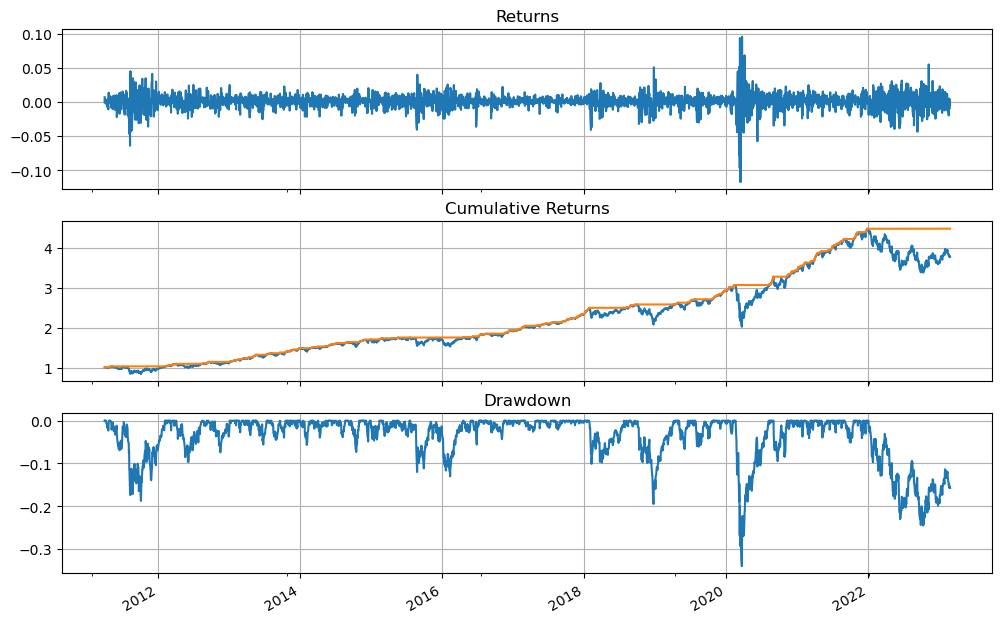

In [74]:
returns = df['LARGE_CAP']
cumulative_returns = (1+returns).cumprod()
peak_returns = cumulative_returns.expanding(min_periods=1).max()
drawdown = (cumulative_returns / peak_returns) - 1

fig, axes = plt.subplots(3, figsize=(12,8), sharex=True)
returns.plot(ax=axes[0], grid=True, title='Returns')
cumulative_returns.plot(ax=axes[1], grid=True, title='Cumulative Returns');
peak_returns.plot(ax=axes[1], grid=True);
drawdown.plot(ax=axes[2], grid=True, title='Drawdown');

We want a reward function that:
1. Maximizes the cumulative returns
2. Minimizes the drawdown

To do this, we take the sum of the cumulative returns and the drawdown. We also weight the drawdown accodrding to a `DRAWDOWN_PENALTY_FACTOR` that can be varied to the investors risk tolerance.

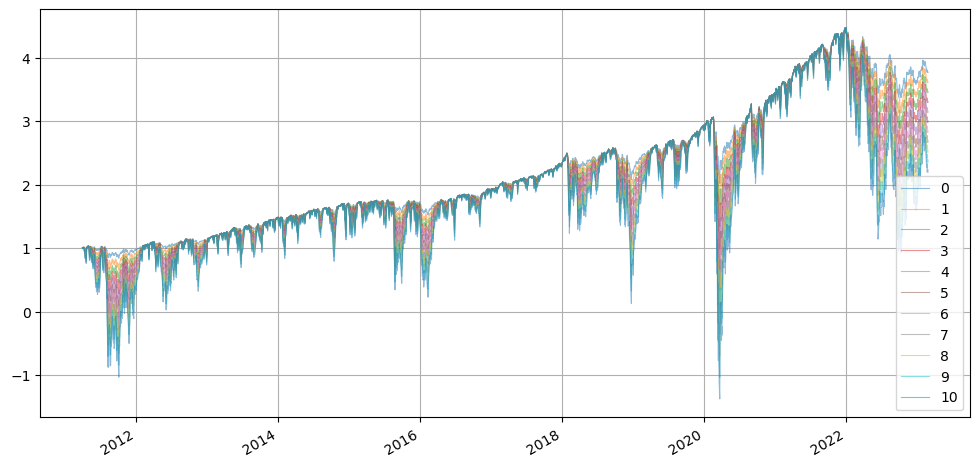

In [120]:
for DRAWDOWN_PENALTY_FACTOR in range(11):
    reward = cumulative_returns + DRAWDOWN_PENALTY_FACTOR * drawdown
    reward.plot(figsize=(12,6), grid=True, label=DRAWDOWN_PENALTY_FACTOR, legend=True, lw=0.8, alpha=0.5);